<a href="https://colab.research.google.com/github/otavioaugusto1/COVID-19/blob/master/An%C3%A1lise_de_s%C3%A9rie_temporal_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/COVID-Alura/main/cases-brazil-states.csv")
dados.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
5,9,2020-02-27,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
7,9,2020-02-28,Brazil,TOTAL,TOTAL,0,0,1,2,0,1,0.0,0.00095,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
9,9,2020-02-29,Brazil,TOTAL,TOTAL,0,0,0,2,0,2,0.0,0.00095,0.0,NaN,NaN,NaN,NaN


In [3]:
df = dados[dados['estado'] != 'TOTAL']

In [4]:
df.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,3,0.0,0.00653,0.0,NaN,NaN,NaN,NaN
18,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,1,0.0,0.00579,0.0,NaN,NaN,NaN,NaN


In [5]:
df['data'] = pd.to_datetime(dados['data']).dt.date

In [6]:
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Óbitos')

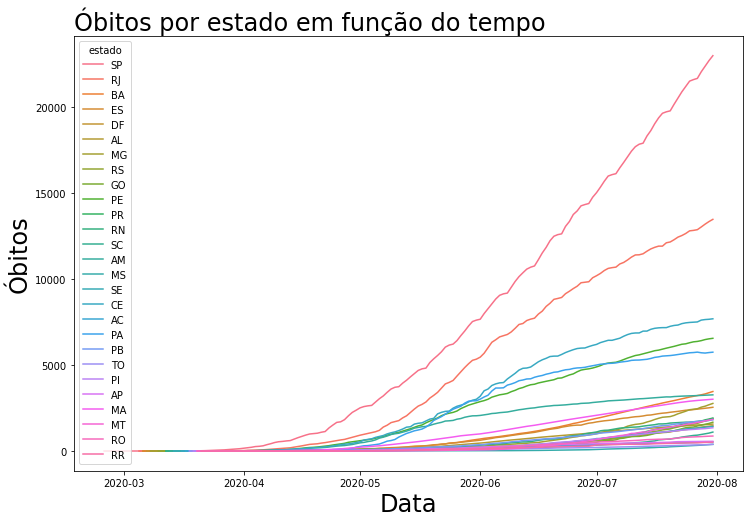

In [7]:
plt.figure(figsize=(12,8))
fig = sns.lineplot(x = 'data',y='Obitos',hue='estado',data=df)
fig.set_title("Óbitos por estado em função do tempo",loc= 'left',fontsize = 24)
fig.set_xlabel("Data",fontsize = 24)
fig.set_ylabel("Óbitos",fontsize = 24)


Como o estado de São Paulo, aparentemente está com a curva de crescimento dos casos parecido com uma exponencial, iremos separar o dataframe filtrando pelo estado de São Paulo dos demais para acharmaos uma maneira de realmente verificarmos se a curva de crescimento é realmente uma exponencial.

In [8]:
df_SP = df[df['estado'] == 'SP']
df_SP.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


Aplicando log no eixo y: óbitos

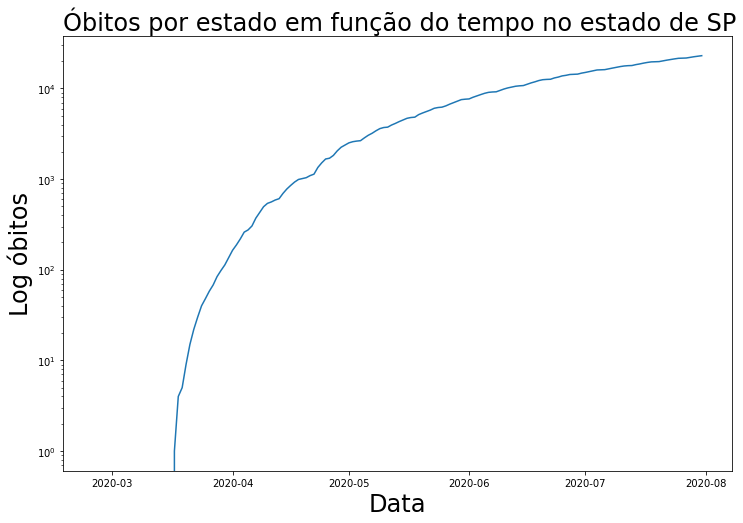

In [9]:
plt.figure(figsize=(12,8))
fig = sns.lineplot(x = 'data',y='Obitos',data=df_SP)
fig.set_title("Óbitos por estado em função do tempo no estado de SP",loc= 'left',fontsize = 24)
fig.set_xlabel("Data",fontsize = 24)
fig.set_ylabel("Log óbitos",fontsize = 24)
fig.set_yscale('log')

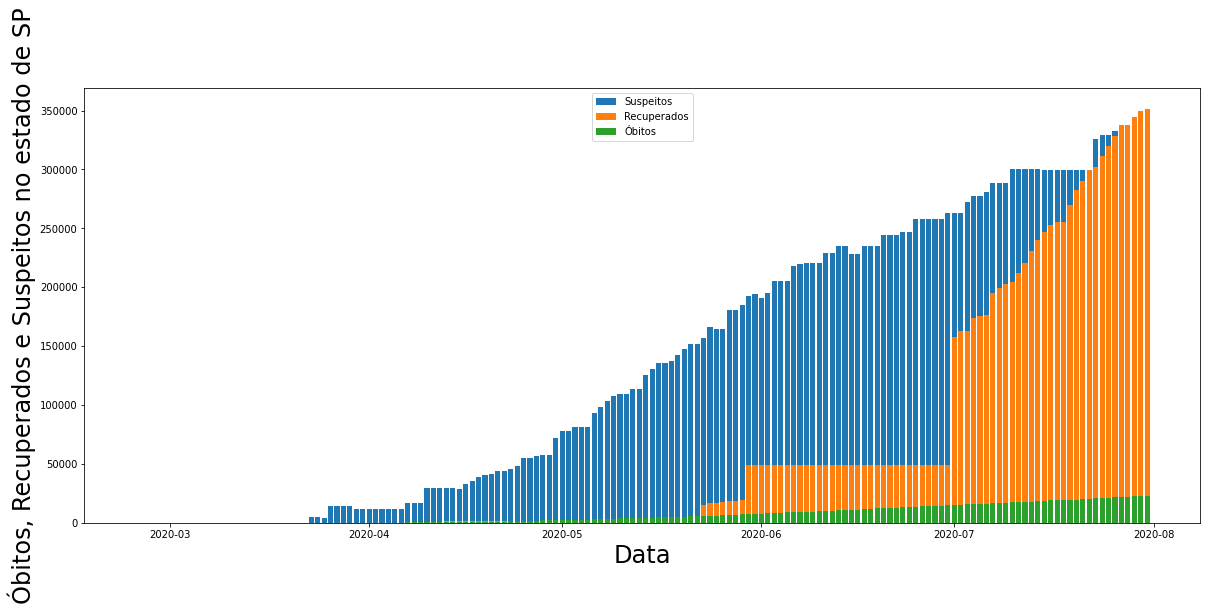

In [10]:
plt.figure(figsize=(20,8))
fig = plt.bar(df_SP.data, df_SP.suspeitos,label = 'Suspeitos')
plt.bar(df_SP.data,df_SP.recuperados,label= 'Recuperados')
plt.bar(df_SP['data'],df_SP['Obitos'],label = 'Óbitos')
plt.xlabel("Data",fontsize = 24)
plt.ylabel("Óbitos, Recuperados e Suspeitos no estado de SP",fontsize = 24, rotation = 90)
plt.legend()


In [11]:
def plotar_linha(titulo, xlabel, ylabel,x,y, dataset, hue):
  ax = sns.lineplot(x=x,y=y,hue=hue, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo,loc = 'left', fontsize = 20)
  ax.set_xlabel(xlabel, fontsize = 20)
  ax.set_ylabel(ylabel, fontsize = 20,rotation = 90)



In [12]:
def plotar_barra(titulo,xlabel,ylabel,x,y,dataset):
  plt.figure(figsize=(20,6))
  ax = plt.bar(dataset[x],dataset[y])
  plt.title(titulo, loc = 'left',fontsize = 20)
  plt.xlabel(xlabel, fontsize = 20)
  plt.ylabel(ylabel, fontsize = 20,rotation = 90)

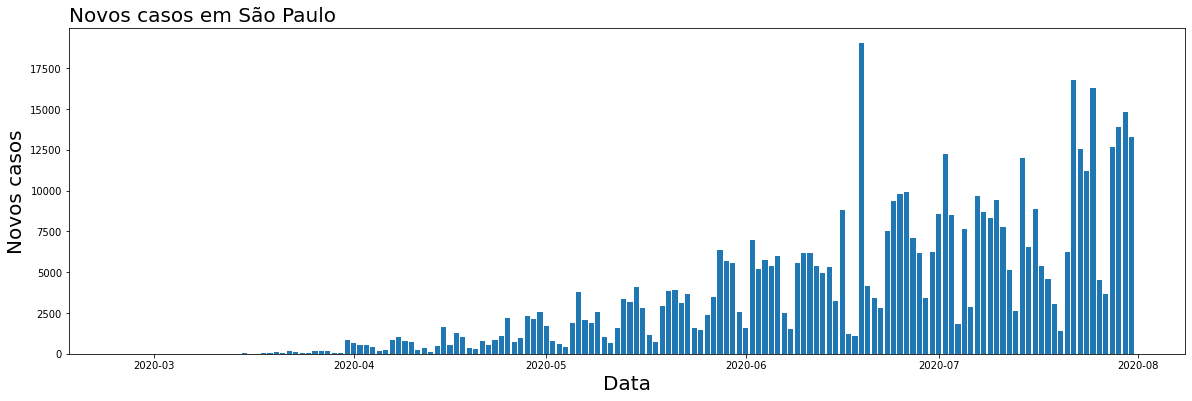

In [13]:
plotar_barra("Novos casos em São Paulo","Data","Novos casos","data","novosCasos",df_SP)

In [14]:
df_SP['aceleracaoCasos'] = df_SP['novosCasos'].diff()
df_SP['aceleracaoObitos'] = df_SP['novosObitos'].diff()
df_SP.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


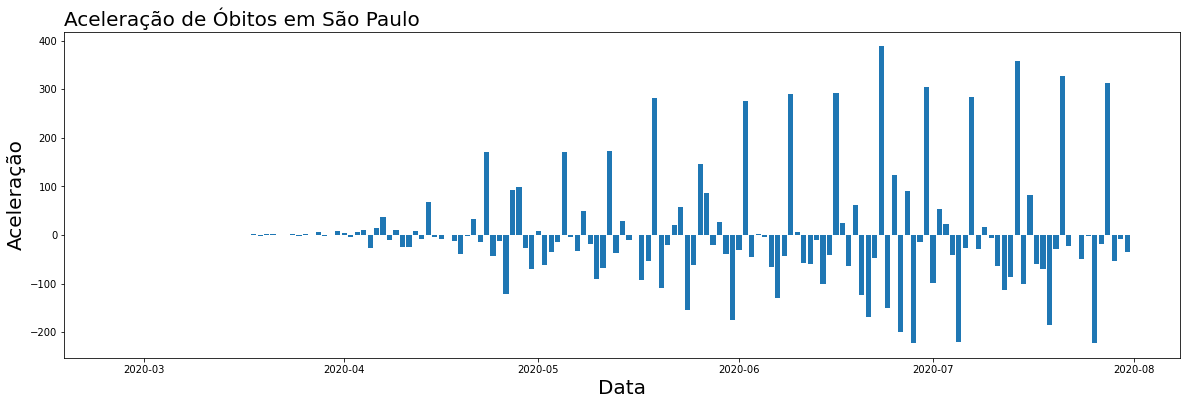

In [15]:
plotar_barra("Aceleração de Óbitos em São Paulo","Data","Aceleração","data","aceleracaoObitos",df_SP)

In [16]:
df_SP['mediaObitos'] = df_SP['novosObitos'].rolling(window=7,center=False).mean()
df_SP['mediaObitos_14'] = df_SP['novosObitos'].rolling(window=14,center=False).mean()
df_SP.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,3,0.0,0.00653,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,6,0.0,0.01307,0.0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN


<BarContainer object of 158 artists>

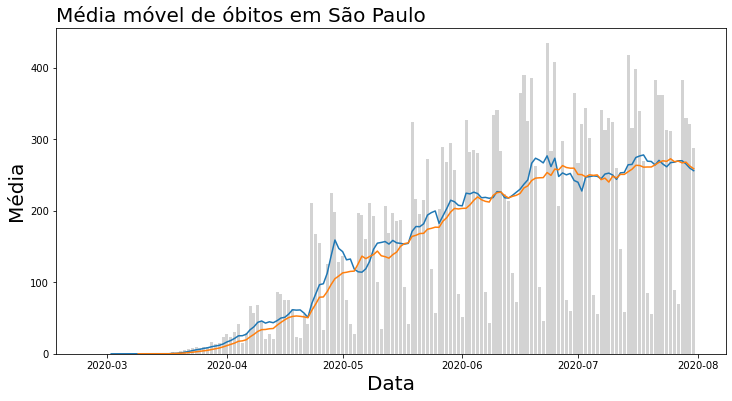

In [17]:
plotar_linha("Média móvel de óbitos em São Paulo","Data","Média","data","mediaObitos",df_SP,None)
plotar_linha("Média móvel de óbitos em São Paulo","Data","Média","data","mediaObitos_14",df_SP,None)
plt.bar(df_SP['data'],df_SP['novosObitos'],color = 'lightgrey')

In [18]:
from pandas.plotting import autocorrelation_plot

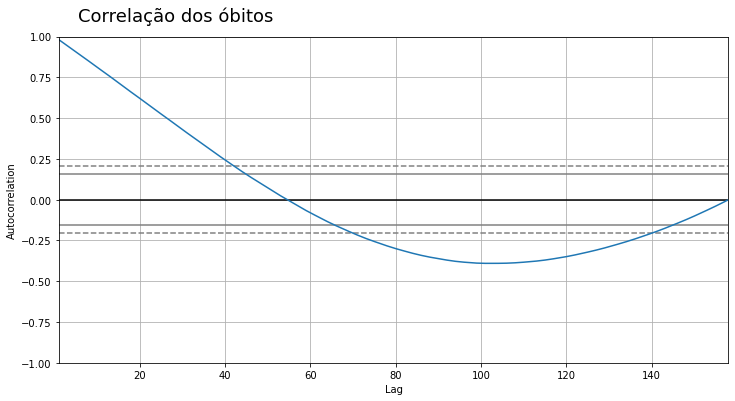

In [19]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação dos óbitos",fontsize = 18,x=0.26,y=0.95)
autocorrelation_plot(df_SP['Obitos'])
ax=ax

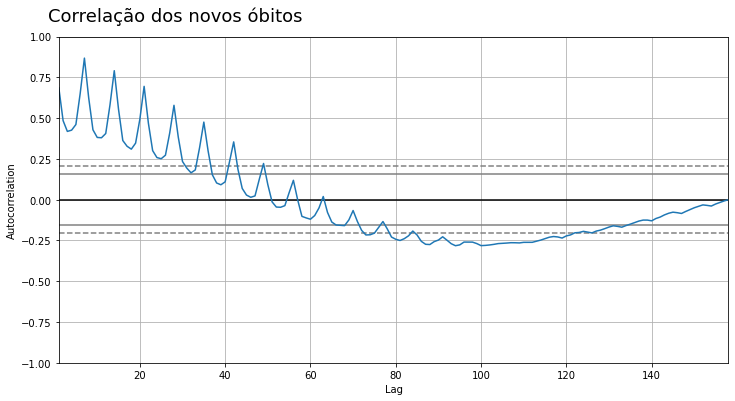

In [20]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação dos novos óbitos",fontsize = 18,x=0.26,y=0.95)
autocorrelation_plot(df_SP['novosObitos'])
ax=ax

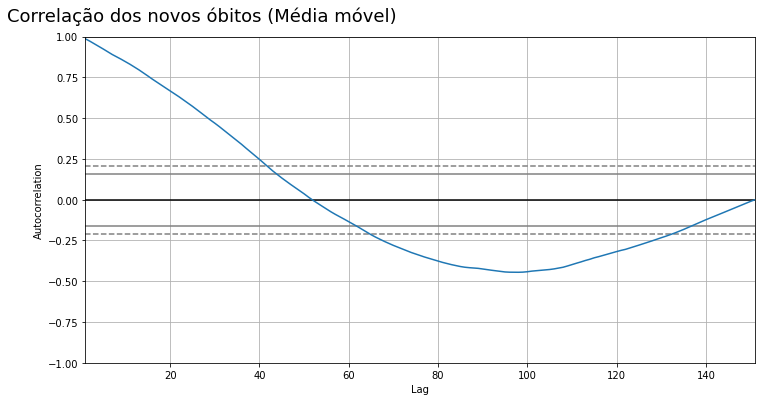

In [21]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação dos novos óbitos (Média móvel)",fontsize = 18,x=0.26,y=0.95)
autocorrelation_plot(df_SP['mediaObitos'][7:])
ax=ax